# 🖼️ 03 - Développement du modèle CNN (Réseau Neuronal Convolutif)

<div style="text-align: justify;">


Le *Deep Learning*, sous-domaine du *Machine Learning*, repose sur l'utilisation de réseaux de neurones pour extraire des caractéristiques complexes à partir des données d'entrée. Cette approche permet de résoudre une variété de problèmes, tels que la **reconnaissance d'images**, la **reconnaissance vocale**, ou encore la **traduction automatique**.

Un des modèles les plus puissants dans ce domaine est le **Réseau Neuronal Convolutif (RNC)**, plus connu sous son acronyme anglophone **CNN** (*Convolutional Neural Network*). Ce modèle est particulièrement efficace pour les tâches liées à l'analyse d'images et de vidéos.

Dans ce projet, nous allons construire un modèle CNN pour la **détection d'objets** à partir de deux ensembles d'images :

- **IMG** : Images microscopiques (données d'entrée).
- **Masks** : Images binaires générées par les annotations (cibles de prédiction).

L'objectif sera de développer un modèle capable d'identifier et de localiser des objets spécifiques dans les images microscopiques à l'aide des **masks** comme référence pour l'apprentissage.


### **1️⃣ Comprendre l'image et les filtres**

Une **image** peut être vue comme une **matrice de pixels**. Chaque pixel a une valeur numérique représentant son intensité lumineuse. Pour une image **noir et blanc**, cette valeur varie entre 0 (noir) et 255 (blanc), tandis que pour une image **RGB**, chaque pixel est composé de trois valeurs pour les canaux **rouge**, **vert**, et **bleu**. 

Un **filtre** (ou noyau) est une petite matrice utilisée pour extraire des **caractéristiques spécifiques** de l'image, comme des bords ou des textures. Appliquer un filtre à une image s'appelle une **convolution**.

### **2️⃣ La Convolution : Application du filtre**

La **convolution** consiste à déplacer un filtre sur l'image et à calculer, à chaque position, un **produit de convolution**. On multiplie les valeurs du filtre par celles des pixels correspondants, puis on additionne les résultats pour créer un nouveau pixel dans une image transformée.

Par exemple, un filtre de flou (moyenne) peut être appliqué sur une image pour adoucir les détails fins, en calculant la moyenne des pixels voisins.

Il existe une exemple interactif ici qui permet de visualiser comment un filtre est appliqué sur une image.
https://setosa.io/ev/image-kernels/

### **3️⃣ Les Couches dans un CNN**

Un **CNN** est composé de **couches successives** de convolution. Chaque couche applique un filtre sur l'image ou l'image transformée, permettant d'extraire des **caractéristiques de plus en plus abstraites**. Les premières couches détectent des caractéristiques simples comme des bords ou des textures, tandis que les couches plus profondes permettent de reconnaître des motifs plus complexes et des objets spécifiques.

### **4️⃣ Pourquoi "Deep" Learning ?**

Le terme **"Deep"** fait référence à la **profondeur** du réseau, c’est-à-dire le nombre de couches dans le modèle. Plus un modèle possède de couches, plus il est capable d’extraire des **caractéristiques complexes** et des représentations fines de l’image.

### **5️⃣ Entraînement du modèle : Ajustement des poids**

Les **poids** dans un CNN sont les valeurs contenues dans la matrice de chaque **filtre**. Ces poids sont initialisés de manière aléatoire au début de l'entraînement. À chaque itération, le modèle compare sa sortie avec la vérité réelle grâce à une **fonction de perte**. En fonction de l'écart entre les prédictions et la vérité réelle, les poids (valeurs des filtres) sont ajustés pour améliorer les performances du modèle. Ce processus est itératif et permet au réseau d'apprendre progressivement à mieux détecter les caractéristiques importantes de l'image.

L'algorythme derrière ce calcul itératif est la Descent de Gradient, que nous allons voir brievement ici:

#### **Descente de gradient vulgarisée**

| **Etape de l'algorithme**                          | **La formule de calcul**                                                                                                                                                                | **Définition des variables**                                                                                                                                       | **Formule mathématique**                                                                                                                            |
|----------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| **1. Initialisation des variables**                | N/A                                                                                                                                                                                     | `W` : Matrice des poids à ajuster (4x4). <br> `X` : Vecteur de caractéristiques (filtre) (1x4). <br> `Y_target` : Valeurs cibles (réelles) (1x4). <br> `eta` : Taux d'apprentissage. | N/A                                                                                                                                            |
| **2. Calcul de la sortie `Y`**                     | `Y = np.dot(W, X)` <br> *Calcul du produit matriciel entre la matrice `W` (4x4) et le vecteur `X` (4x1).* <br> Cela donne un vecteur `Y` (4x1) qui contient les prédictions.         | `Y` : Vecteur des prédictions calculées comme le produit matriciel de `W` et `X`. Pour chaque ligne de `W`, chaque élément est multiplié par les éléments de `X`. | $$ Y = W \cdot X $$                                                                                                                            |
| **3. Calcul de la fonction de coût (MSE)**         | `J_total = np.mean((Y - Y_target) ** 2)`                                                                                                                                                 | `J_total` : Fonction de coût, mesurant l'écart entre les prédictions `Y` et les valeurs cibles `Y_target`.                                                      | $$ J_{total} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - Y_{target,i})^2 $$                                                                              |
| **4. Calcul du gradient**                          | `grad = (1 / 4) * 2 * (Y - Y_target)[:, np.newaxis] * X`                                                                                                                                 | `grad` : Gradient, indiquant comment ajuster les poids pour minimiser l'erreur.                                                                                   | $$ \nabla_W J_{total} = \frac{2}{n} (Y - Y_{target})^T \cdot X $$ <br> *Le T dans la formule représente la transposée du vecteur `(Y - Y_target)`, ce qui permet de multiplier correctement les matrices.* |
| **5. Mise à jour des poids**                       | `W -= eta * grad`                                                                                                                                                                      | `W` : Poids ajustés après chaque itération en fonction du gradient et du taux d'apprentissage `eta`.                                                             | $$ W \leftarrow W - \eta \cdot \nabla_W J_{total} $$                                                                                           |


</div>


In [ ]:
import numpy as np

# Initialisation des matrices et variables
W = np.array([[0.1, 0.2, 0.3, 0.4],
              [0.5, 0.6, 0.7, 0.8],
              [0.9, 1.0, 1.1, 1.2],
              [1.3, 1.4, 1.5, 1.6]])

X = np.array([1, 0.5, 0.3, 0.7])  # Filtre
Y_target = np.array([0.5, 0.8, 0.3, 0.9])  # Valeurs cibles
eta = 0.1  # Taux d'apprentissage
print(f"X dimension : {X.shape}, Y dimension: {Y_target.shape}")

# Critère de convergence
max_iterations = 1000
convergence_threshold = 1e-4
iteration = 0
prev_J_total = np.inf

# Répétition du processus pour un certain nombre d'itérations
while iteration < max_iterations:
    # Calcul de la sortie Y pour toute la matrice W
    Y = np.dot(W, X)
    
    # Calcul de la fonction de coût J(W) pour toute la matrice
    J_total = np.mean((Y - Y_target)**2)
    print(f"Fonction de coût totale à l'itération {iteration} : {J_total}")
    
    # Vérification de la convergence
    if abs(J_total - prev_J_total) < convergence_threshold:
        print(f"Convergence atteinte à l'itération {iteration}")
        break
    
    # Calcul du gradient pour chaque ligne de W
    grad = (1 / 4) * 2 * (Y - Y_target)[:, np.newaxis] * X  # Gradient pour chaque ligne, le terme [:, np.newaxis] permet d'ajouter une dimension pour le calcul avec X
    W -= eta * grad  # Mise à jour des poids

    prev_J_total = J_total
    iteration += 1

print(f"\nPoids finaux après {iteration} itérations :\n{W}")

**Les poids de la matrice W déterminé par l'algorythme  Descente de Gradient**

$$
W = 
\begin{bmatrix}
0.06221165 & 0.18110582 & 0.28866349 & 0.37354815 \\
0.08432812 & 0.39216406 & 0.57529844 & 0.50902969 \\
-0.32542229 & 0.38728886 & 0.73237331 & 0.3422044 \\
-0.14135573 & 0.67932214 & 1.06759328 & 0.59105099
\end{bmatrix}
$$

##### **6️⃣ Quelques mots sur la librairie en deep learning Keras**

Keras est une bibliothèque open source en Python, développée par l'ingénieur français **François Chollet**, pour créer des applications de deep learning en simplifiant l'utilisation des réseaux de neurones artificiels. Compatible avec plusieurs backends, comme TensorFlow (que nous utiliserons dans ce cas d'étude), Keras permet de concevoir des modèles pour des applications variées telles que la vision par ordinateur ou le traitement du langage naturel.


Chargement des images et des masques ...
Images shape: (97, 128, 128, 3)
Masks shape: (97, 128, 128, 1)
Entrainement du Modèle...
Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.6356 - loss: 5.7912 - val_accuracy: 0.8506 - val_loss: 5.1573 - learning_rate: 7.0000e-04
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.6391 - loss: 4.7383 - val_accuracy: 0.8215 - val_loss: 4.2407 - learning_rate: 7.0000e-04
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.7436 - loss: 3.8263 - val_accuracy: 0.6767 - val_loss: 3.4564 - learning_rate: 7.0000e-04
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.8200 - loss: 3.0738 - val_accuracy: 0.5379 - val_loss: 2.8250 - learning_rate: 7.0000e-04
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.8617 - loss: 2.4753 - val_accuracy: 0.5542 - val_loss: 2.3274 - learning_rate: 7.0000e-04
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.8853 - loss: 2.0092

Modèle enregistré sous: Evaluate_and_Analyze\data_CNN_h5_V1.0\Globules_blanc_detecteur_V1.0.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9760 - loss: 0.0635
Test Perte (Loss): 6.35, Test Précision (Accuracy): 97.6


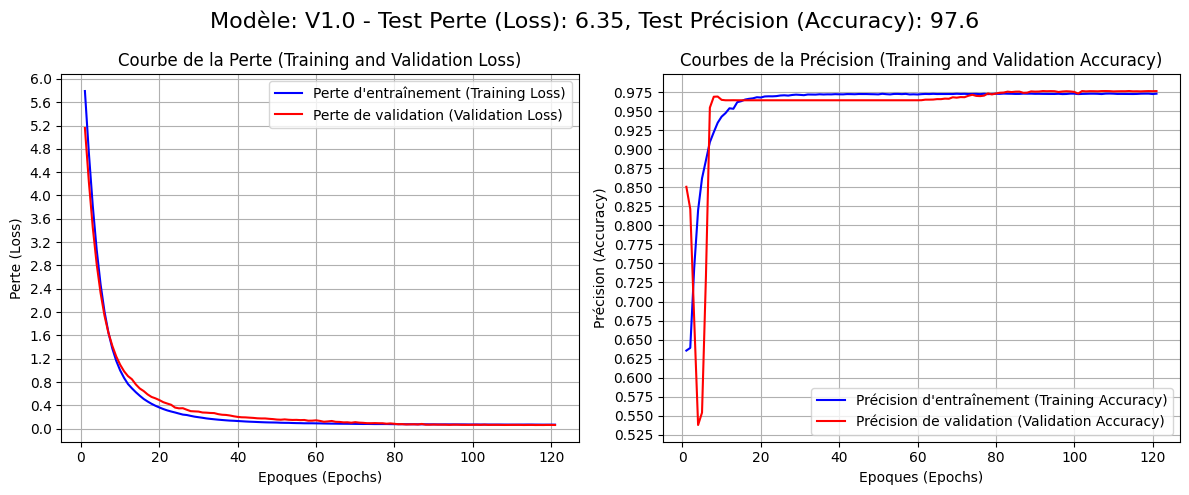

In [1]:
import os
from pathlib import Path
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Limitez les threads à 2 (par exemple)
# os.environ["OMP_NUM_THREADS"] = "2"
# os.environ["TF_NUM_INTRAOP_THREADS"] = "2"
# os.environ["TF_NUM_INTEROP_THREADS"] = "2"

# Facultatif : Afficher les informations TensorFlow
# tf.debugging.set_log_device_placement(True)

# Paths
version_model = "V1.0"
image_path = Path("./IMG") # Le dossier contenant les images microscopes des patients
mask_path = Path("./Masks")  # Le dossier contenant les images binaires issues des annotations
save_result_path = Path(f"./Evaluate_and_Analyze/data_CNN_h5_{version_model}") # Le dossier contenant les résultats du calcul sous format h5
save_result_path.mkdir(parents=True, exist_ok=True)  # Créer le répertoire si nécessaire pr sauvegarder le model
log_dir = Path(f"./Evaluate_and_Analyze/logs/data_log_CNN_{version_model}")
log_dir.mkdir(parents=True, exist_ok=True)  # Créer le répertoire si nécessaire

img_size = (128, 128)
batch_size = 8


def load_images(path, size, is_mask=False):
    """
    Charge des images ou des masques depuis un dossier, redimensionne, et vérifie leur format.
    
    Args:
        path (str): Chemin vers le dossier contenant les images ou masques.
        size (tuple): Taille cible pour redimensionner les images (hauteur, largeur).
        is_mask (bool): Si True, charge des masques (format binaire, (256, 256, 1)), sinon charge des images (format RGB, (256, 256, 3)).
    
    Returns:
        np.array: Tableau contenant les images ou masques traités.
    """
    images = []
    for file_name in sorted(os.listdir(path)):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            # Définir color_mode conditionnellement
            color_mode = 'grayscale' if is_mask else 'rgb'

            # Charger l'image avec le color_mode approprié
            img = load_img(os.path.join(path, file_name), target_size=size, color_mode=color_mode)
            
            # Convertir l'image en tableau numpy
            img = img_to_array(img)

            if is_mask:
                # S'assurer que le masque est binaire (0 ou 1)
                img = (img > 0).astype(np.uint8)
                
                # Vérifier la forme du masque (256, 256, 1)
                if img.shape != (size[0], size[1], 1):
                    print(f"Warning: Mask {file_name} has shape {img.shape}, expected {(size[0], size[1], 1)}")
            else:
                # Si c'est une image (3 canaux)
                if img.shape[-1] != 3:
                    print(f"Warning: Image {file_name} has shape {img.shape}, expected {(size[0], size[1], 3)}")
                img = img / 255.0  # Normaliser les images entre 0 et 1
                img = img.astype(np.float32)  # Convertir en np.float32 pour la compatibilité avec Keras

            images.append(img)
    
    return np.array(images)


def model_CNN_v1(input_shape):
    """
    Version avec régularisation L2 progressive suivant les couches.
    """
    inputs = layers.Input(shape=input_shape)
    # ----------------------------------------------------
    # 1/ La régularisation L2 est utilisée pour chaque couche convolutionnelle afin de pénaliser les poids trop grands
    # ----------------------------------------------------
    # 2/ Les neurones : 8 filtres, 16 filtres, et 32 filtres > correspond au nombre de filtre par couche
    #    Chaque neurone correspond à un filtre appliqué sur les données d'entrée à la couche respective.
    #    Les couches sont liées entre elles, où la sortie de la couche précédente est l'entrée de la couche suivante.
    # ----------------------------------------------------
    # 3/ Rôle de la fonction d'activation ReLU : Après la convolution, 
    #    ReLU (Rectified Linear Unit) est utilisée pour introduire de la non-linéarité. 
    #    Elle remplace les valeurs négatives par zéro, ce qui aide à modéliser des relations complexes dans les données.
    # ----------------------------------------------------
    # 4/ En sortie de réseau : 1 neurone parce que l'on veut une seule valeur en sortie, avec fonction d'activation sigmoid
    #    pour avoir une valeur entre 0 et 1:  Cela aide à éviter le surapprentissage (overfitting)
    # ----------------------------------------------------
    # 5/ Le modèle est compilé avec :
    #    Optimiseur : Adam, qui est une version adaptative du Gradient Descent.
    #    Perte : binary_crossentropy, adaptée à un problème de classification binaire.
    #    Métrique : accuracy, pour évaluer la performance du modèle en termes de précision.
    # ----------------------------------------------------

    c1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same', 
                       kernel_regularizer=regularizers.l2(0.01))(inputs)
    c1 = layers.BatchNormalization()(c1)

    # Couches intermédiaires avec une régularisation modérée
    c2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same', 
                       kernel_regularizer=regularizers.l2(0.1))(c1)
    c2 = layers.BatchNormalization()(c2)

    # Couches profondes avec régularisation L2 plus forte
    c3 = layers.Conv2D(32, (5, 5), activation='relu', padding='same', 
                       kernel_regularizer=regularizers.l2(0.2))(c2)
    c3 = layers.BatchNormalization()(c3)

    # Pour la segmentation binaire, une convolution 1x1 avec activation sigmoid
    mask = layers.Conv2D(1, (1, 1), activation='sigmoid', name='mask')(c3)

    # Création du modèle
    model = models.Model(inputs=inputs, outputs=mask)

    # Compilation du modèle
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Charger les données
print("Chargement des images et des masques ...")
# Charger les images (is_mask=False pour les images, 3 canaux)
images = load_images(image_path, img_size, is_mask=False)
# Charger les masques (is_mask=True pour les masques, 1 canal, binaire)
masks = load_images(mask_path, img_size, is_mask=True)
# Afficher les shapes pour vérifier
print("Images shape:", images.shape)  # (n_samples, 256, 256, 3)
print("Masks shape:", masks.shape)    # (n_samples, 256, 256, 1)

# Découper les données pour l'entraînement et le test, respectivement pour les images et les masques
train_size = int(0.8 * len(images))
X_train, X_test = images[:train_size], images[train_size:]
y_train, y_test = masks[:train_size], masks[train_size:]

# Construire le Modèle
input_shape = img_size + (3,)
model = model_CNN_v1(input_shape)

# Compiler le modèle avec l'optimiseur Descent Gradient Adam, avec fixation du learning rate
optimizer = optimizers.Adam(learning_rate=0.0007)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Créer le callback EarlyStopping : si pas d'amélioration dans la convergence basé sur la perte validation, le calcul s'arrête.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Créer le callback TensorBoard pour enregistrer les logs pour l'analyse
tensorboard_callback = TensorBoard(
    log_dir=log_dir,  # Dossier où enregistrer les logs
    histogram_freq=1,  # Enregistrer les histogrammes des poids à chaque époque
    write_graph=True,  # Sauvegarder le graphe du modèle
    update_freq='epoch'  # Sauvegarder après chaque époque
    )
# # Création du callback ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

print("Entrainement du Modèle...")
# On lance la Descent de Gradient pour calculer des poids adaptés à notre problème.
# Loss > le calcul de l'erreur : censer diminuer au fil des époques.
# Acc > C'est ce qui va nous interesser, c'est la précision : 1ere époque valeur basse, les poids sont initiés aléatoirement en début de calcul, puis augmente.
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=200,
    callbacks=[early_stopping, tensorboard_callback, reduce_lr]  # Ajouter le callback EarlyStopping pour stop le calcul si nécessaire et Tensorboard pour l'analyse
)

# Sauvegarder les données du Modèle au format h5
model_path = save_result_path / f"Globules_blanc_detecteur_{version_model}.h5"
model.save(model_path)
print(f"Modèle enregistré sous: {model_path}")

# Evaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
LOSS = round(loss*100, 2)
ACCURACY = round(accuracy*100, 2)
print(f"Test Perte (Loss): {LOSS}, Test Précision (Accuracy): {ACCURACY}")


# Extraire les données de la précision et de la perte pour  l'entraînement & la validation
# Pour tracer les courbes de la Perte et de la Précision (entraînement et validation)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Fixer le range des Epoques
epochs = range(1, len(train_loss) + 1)

# Courbe de la Perte
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Perte d\'entraînement (Training Loss)')
plt.plot(epochs, val_loss, 'r', label='Perte de validation (Validation Loss)')
plt.title('Courbe de la Perte (Training and Validation Loss)')
plt.xlabel('Epoques (Epochs)')
plt.ylabel('Perte (Loss)')
plt.legend()

# Contrôler la graduation de l'axe Y de manière plus fluide pour les courbes de précision
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=20))  # Augmenter le nombre de ticks sur l'axe Y
plt.grid(True)  # Ajouter une grille


# Courbe de la Précision
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Précision d\'entraînement (Training Accuracy)')
plt.plot(epochs, val_accuracy, 'r', label='Précision de validation (Validation Accuracy)')
plt.title('Courbes de la Précision (Training and Validation Accuracy)')
plt.xlabel('Epoques (Epochs)')
plt.ylabel('Précision (Accuracy)')
plt.legend()

# Contrôler la graduation de l'axe Y de manière plus fluide pour les courbes de précision
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=20))  # Augmenter le nombre de ticks sur l'axe Y
plt.grid(True)  # Ajouter une grille

# Ajouter un titre global pour la figure
plt.suptitle(f"Modèle: {version_model} - Test Perte (Loss): {LOSS}, Test Précision (Accuracy): {ACCURACY}", fontsize=16)

# Afficher les courbes, et sauvegarder la figure
plt.tight_layout()
plt.savefig(save_result_path / f"Precision_Perte_{version_model}.png")